# Project 10-2: Use linear regression with the MPG data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Tasks

In [2]:
# 1
data = sns.load_dataset('mpg')

In [3]:
# 2
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
# 3
data[['mpg','displacement','horsepower','weight','acceleration']].corr()[['mpg']].sort_values('mpg', ascending=False)

,mpg
mpg,1.000000
acceleration,0.420289
horsepower,-0.778427
displacement,-0.804203
weight,-0.831741


In [6]:
# 4
x_train, x_test, y_train, y_test = train_test_split(
    data[['weight']], data[['mpg']],
    test_size=0.20, random_state=20)

In [7]:
# 5
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# 6
model.score(x_test,y_test)

0.6913392734724182

In [9]:
# 7
model.score(x_train,y_train)

0.6863542676327211

In [10]:
# 8
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns=['predicted_mpg'])

In [11]:
# 9
combined = x_test.reset_index(drop=True).join([y_test.reset_index(drop=True), predicted])
combined.head()

,weight,mpg,predicted_mpg
0,3563,15.0,18.868866
1,3410,18.1,20.015039
2,2320,34.5,28.180585
3,3410,16.2,20.015039
4,2587,21.0,26.180401


In [12]:
# 10
combined['residuals'] = combined.mpg - combined.predicted_mpg

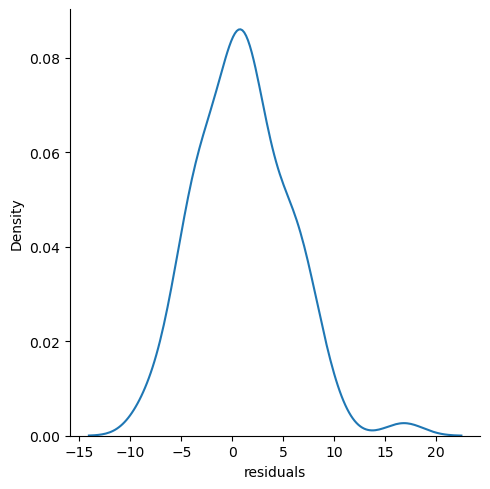

In [13]:
# 11
sns.displot(data=combined, x='residuals', kind='kde')

In [14]:
# 12
melted = pd.melt(combined, id_vars=['weight'], value_vars=['mpg','predicted_mpg'], 
                    var_name='mpg_type', value_name='mpg_value')

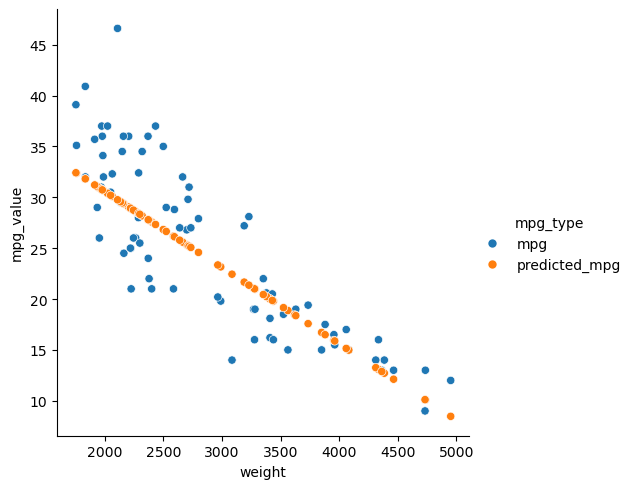

In [15]:
# 13
sns.relplot(data=melted, x='weight', y='mpg_value', hue='mpg_type')